### Model Training on Insurance Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn

In [3]:
dataset_downlode_url = "D:\Insurance-prediction-Project\Insurance-Prediction-Project\insurance.csv"
data_df = pd.read_csv(dataset_downlode_url)
data_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data_df.shape

(1338, 7)

In [5]:
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
data_df.duplicated().sum()

1

In [7]:
data_df.drop_duplicates(inplace=True)

In [8]:
data_df.shape

(1337, 7)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
data_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [11]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [12]:
numerical_features = [i for i in data_df.columns if data_df[i].dtype !='object']
numerical_features

['age', 'bmi', 'children', 'expenses']

In [13]:
categorical_features = [i for i in data_df.columns if i not in numerical_features]
categorical_features

['sex', 'smoker', 'region']

In [14]:
discreate_features = [i for i in numerical_features if len(data_df[i].unique())<=30]
discreate_features

['children']

In [15]:
continous_features = [i for i in numerical_features if i not in discreate_features]
continous_features

['age', 'bmi', 'expenses']

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_8044\191070385.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True, cmap='RdBu_r')


<function matplotlib.pyplot.show(close=None, block=None)>

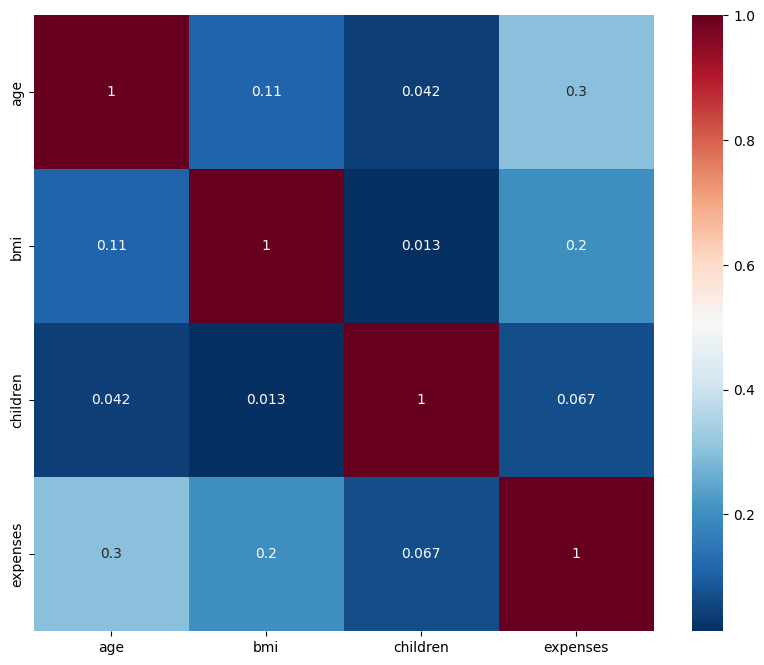

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data_df.corr(), annot=True, cmap='RdBu_r')
plt.show

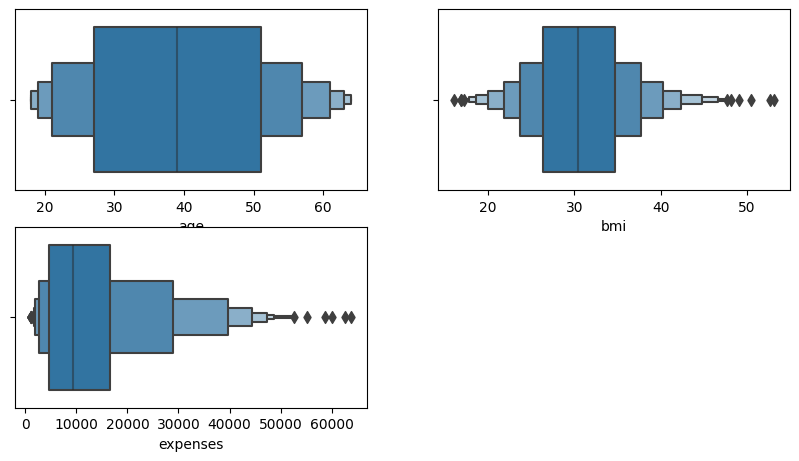

In [17]:
plt.figure(figsize=(10,8))
for i in range(0,len(continous_features)):
    plt.subplot(3,2,i+1)
    sns.boxenplot(x=data_df[continous_features[i]])
    plt.xlabel(continous_features[i])

In [18]:
# checking skweness

outliers_features = ['bmi', 'expenses']
data_df[outliers_features].skew(axis=0, skipna=True)

bmi         0.284463
expenses    1.515391
dtype: float64

In [19]:
for outliers in outliers_features:
    p25 = data_df[outliers].quantile(0.25)
    p75 = data_df[outliers].quantile(0.75)
    
    iqr = p75 - p25
    
    data_upper_limit = p75 + 1.5 * iqr
    data_lower_limit = p25 - 1.5 * iqr
    print(f"For ----{outliers}---")
    print("Upper limit",data_upper_limit)
    print("Lower limit",data_lower_limit)
    
    print(f"No.of outliers above upper limit is {len(data_df.loc[(data_df[outliers]> data_upper_limit), outliers])}")
    print(f"No.of outliers below lower limit is {len(data_df.loc[(data_df[outliers] < data_lower_limit), outliers])}")
    print(f"Total no.of outliers are {len(data_df.loc[(data_df[outliers]> data_upper_limit), outliers]) + len(data_df.loc[(data_df[outliers] < data_lower_limit), outliers])}")

    data_df.loc[(data_df[outliers]> data_upper_limit), outliers] = data_upper_limit
    data_df.loc[(data_df[outliers]< data_lower_limit), outliers] = data_lower_limit
    
    
    

For ----bmi---
Upper limit 47.300000000000004
Lower limit 13.699999999999998
No.of outliers above upper limit is 9
No.of outliers below lower limit is 0
Total no.of outliers are 9
For ----expenses---
Upper limit 34524.79
Lower limit -13120.73
No.of outliers above upper limit is 139
No.of outliers below lower limit is 0
Total no.of outliers are 139


In [20]:

data_df[outliers_features].skew(axis=0 , skipna= True)

bmi         0.233132
expenses    1.084698
dtype: float64

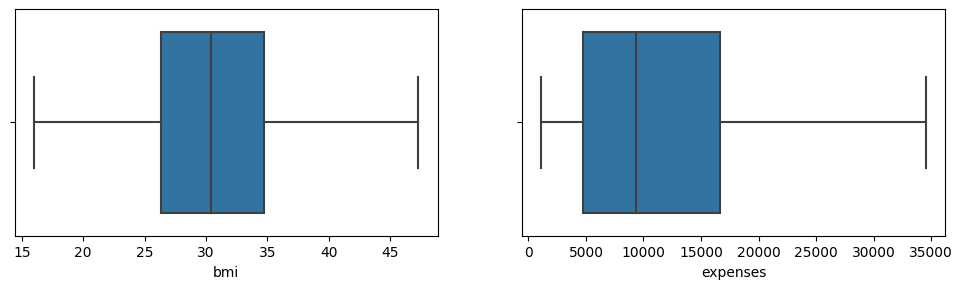

In [21]:
plt.figure(figsize=(12,10))
for i in range(0,len(outliers_features)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = data_df[outliers_features[i]])
    plt.xlabel(outliers_features[i])

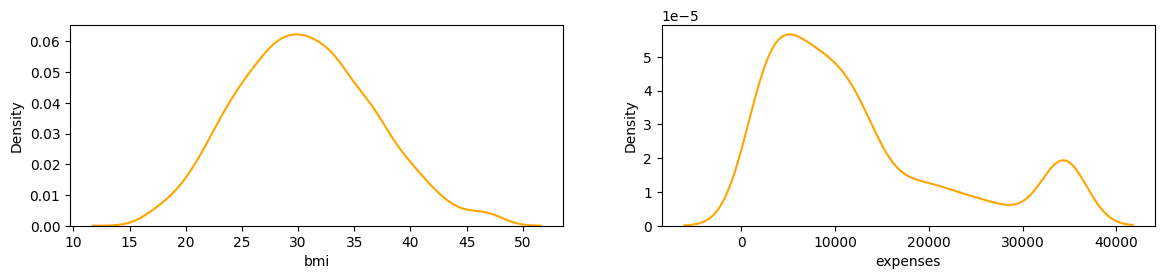

In [23]:
plt.figure(figsize=(14, 12))
for i, outlier in enumerate(outliers_features):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=data_df[outlier], color='orange')
    plt.xlabel(outlier)

Before outliers handling the above plots were not normally distributed. Expense plot was like power law shaped. Now after outliers capping the distribution of the data now in Normal.

**---> Feature Encoding and Feature Scaling**

Now we will do encoding using OneHotEncoder for our categorical features as machine learnig only understands numbers. We will also do feature scaling of our numerical features using SatandardScalar.

But before that we need to split our data into independent columns (varibale X ) and dependent column (variable y).Lets do that



#### Feature Selection

In [24]:
# Splitting data into independent and dependent columns X, y

X = data_df.drop(['expenses'], axis = 1)
y = data_df['expenses']

In [25]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [28]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [29]:
numerical_features_tr = X.select_dtypes(exclude='object').columns
categorical_features_tr = X.select_dtypes(include='object').columns 

Now we will use Column Transformer because this estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This estimater takes list of tuples (name, transformer, columns) specifying the transformer objects to be applied to subsets of the data.

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

st_scaler = StandardScaler()
one_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [('OneHotEncoder', one_encoder, categorical_features_tr),
     ("StandardScaler", st_scaler, numerical_features_tr)]
)

X = preprocessor.fit_transform(X)

#### Train and Test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape

((1069, 11), (268, 11))

#### Model Selection

- Now we will use various regressions models but for now we will use default values i.e without hyper parameter tunning.

- We will also chose the best parameter for our model . i.e hyper parameter tunning . and try to get the better result as   compared to without hyper parameter tunnning.

- For evaluating the quality of predictions we will use :

1. mean absoulte error
2. mean squared error
3. root mean squared error
4. R2 score

In [50]:
# Creating function to evaluate our models

from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

def model_evaluation(true_value, predicted_value):
    mae = mean_absolute_error(true_value, predicted_value)
    mse = mean_squared_error(true_value, predicted_value)
    rmse = np.sqrt(mean_squared_error(true_value, predicted_value))
    r2_square = r2_score(true_value, predicted_value)
    return mae, mse,rmse, r2_square

In [51]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

model_list = [LinearRegression() ,
          Ridge() , 
          Lasso() ,
          KNeighborsRegressor(),
          RandomForestRegressor(), 
          DecisionTreeRegressor(),  
          CatBoostRegressor(verbose=False) ,
          XGBRegressor(),
          AdaBoostRegressor()
          ]

In [52]:
r2 = []
model_list_name = ["Linear Regression", "Ridge", "Lasso", "KNeighbors Regressor","Random Forest Regressor", "Decision Tree Regressor" , "Cat Boost Regressor", "XGB Regressor", "AdaBoostRegressor"]
for model in range(len(model_list)) :

    # Training our model
    model_list[model].fit(X_train, y_train)

    # Making predictions
    y_train_predicted = model_list[model].predict(X_train)
    y_test_predicted = model_list[model].predict(X_test)

    # Evaluating train and test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_predicted)
    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_predicted)

    r2.append(model_test_r2)
    
    print(model_list_name[model])
    print('Model performance for Training set')

    print(f"---> Mean Absolute Error: {model_train_mae}")
    print(f"---> Mean Squared Error: {model_train_mse}")
    print(f"---> Root Mean Squared Error: {model_train_rmse}")
    print(f"---> R2 Score: {model_train_r2}")

    print("__________________________________________________________")
    
    print('Model performance for Test set')


    print(f"---> Mean Absolute Error: {model_test_mae}")
    print(f"---> Mean Squared Error: {model_test_mse}")
    print(f"---> Root Mean Squared Error: {model_test_rmse}")
    print(f"---> R2 Score: {model_test_r2}")

    
    print('*'*45)
    print('\n')

Linear Regression
Model performance for Training set
---> Mean Absolute Error: 3429.524127903677
---> Mean Squared Error: 27396574.74979442
---> Root Mean Squared Error: 5234.173740887326
---> R2 Score: 0.7253525382757413
__________________________________________________________
Model performance for Test set
---> Mean Absolute Error: 3151.5021213468863
---> Mean Squared Error: 20908020.127935823
---> Root Mean Squared Error: 4572.528854795322
---> R2 Score: 0.8210752273395316
*********************************************


Ridge
Model performance for Training set
---> Mean Absolute Error: 3434.716128795149
---> Mean Squared Error: 27397129.462729692
---> Root Mean Squared Error: 5234.226730160788
---> R2 Score: 0.7253469773433603
__________________________________________________________
Model performance for Test set
---> Mean Absolute Error: 3160.199891104523
---> Mean Squared Error: 20945337.886458687
---> Root Mean Squared Error: 4576.607683258277
---> R2 Score: 0.820755872784722

Result (r2 score) of all model at one place

In [53]:
pd.DataFrame(zip(model_list_name, r2) ,columns= ["Model" , "R2_square"]).sort_values(by=['R2_square'], ascending= False).reset_index(drop=True)

,Model,R2_square
0,Cat Boost Regressor,0.854920
1,AdaBoostRegressor,0.843464
2,Random Forest Regressor,0.843259
3,Linear Regression,0.821075
4,Lasso,0.820998
5,Ridge,0.820756
6,XGB Regressor,0.807902
7,KNeighbors Regressor,0.775354
8,Decision Tree Regressor,0.717431


Here we can use top three with high r2 square score for hyper parameter tunning in order to improve the score. So we will use Random Forest Regressor,Cat Boost Regressor and AdaBoostRegressor.

 